In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660438 entries, 0 to 4660437
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   fecha_corte      int64  
 1   id_persona       object 
 2   sexo             float64
 3   fecha_naci       float64
 4   edad             float64
 5   r_edad           float64
 6   estcivil         float64
 7   departamento     float64
 8   aportante        int64  
 9   tipo_afil        float64
 10  tipo_dep         float64
 11  tipo_trabajador  float64
 12  tipo_empleo      int64  
 13  aporte           float64
 14  remuneracion     float64
 15  primer_periodo   float64
 16  ultimo_periodo   float64
 17  nro_aportes      int64  
 18  monto_aportes    float64
dtypes: float64(14), int64(4), object(1)
memory usage: 675.6+ MB


In [5]:
df = df.drop(columns=["id_persona", "fecha_corte", "fecha_naci","ultimo_periodo","primer_periodo","monto_aportes"], axis=1)
df

,sexo,edad,r_edad,estcivil,departamento,aportante,tipo_afil,tipo_dep,tipo_trabajador,tipo_empleo,aporte,remuneracion,nro_aportes
0,NaN,70.0,6.0,NaN,NaN,0,1.0,1.0,21.0,0,52.000000,400.00000,1
1,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,21.0,0,45.000000,346.15384,1
2,NaN,NaN,NaN,NaN,NaN,0,2.0,2.0,53.0,0,111.000000,853.84613,6
3,NaN,NaN,NaN,NaN,NaN,0,2.0,2.0,34.0,0,46.000000,353.84616,1
4,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,21.0,0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660433,0.0,40.0,3.0,NaN,14.0,0,1.0,1.0,21.0,0,48.360001,372.00000,9
4660434,0.0,33.0,2.0,NaN,14.0,0,1.0,1.0,21.0,0,75.559998,581.23077,4
4660435,1.0,59.0,5.0,NaN,14.0,1,1.0,1.0,21.0,0,195.000000,1500.00000,4
4660436,1.0,59.0,5.0,NaN,NaN,0,1.0,1.0,21.0,0,NaN,NaN,1


In [6]:
df.duplicated().sum()

327969

In [8]:
# drop all null
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
# count null values in each column
df.isnull().sum()

sexo                 28670
edad                  2074
r_edad                2074
estcivil           1653958
departamento         26476
aportante                0
tipo_afil            28643
tipo_dep             28643
tipo_trabajador     186964
tipo_empleo              0
aporte              231484
remuneracion        231484
nro_aportes              0
dtype: int64

In [10]:
# drop all null
df = df.dropna()
df.isnull().sum()

sexo               0
edad               0
r_edad             0
estcivil           0
departamento       0
aportante          0
tipo_afil          0
tipo_dep           0
tipo_trabajador    0
tipo_empleo        0
aporte             0
remuneracion       0
nro_aportes        0
dtype: int64

In [11]:
df.head()

,sexo,edad,r_edad,estcivil,departamento,aportante,tipo_afil,tipo_dep,tipo_trabajador,tipo_empleo,aporte,remuneracion,nro_aportes
14,0.0,48.0,4.0,1.0,14.0,0,1.0,1.0,21.0,0,71.50000,550.000000,39
22,1.0,55.0,5.0,2.0,14.0,0,1.0,1.0,71.0,0,4.03000,31.000002,129
23,1.0,53.0,4.0,1.0,11.0,0,1.0,1.0,20.0,1,144.44000,1111.076900,1
25,1.0,64.0,5.0,1.0,16.0,0,1.0,1.0,27.0,1,244.17999,1878.307600,6
29,0.0,47.0,4.0,1.0,7.0,0,1.0,1.0,21.0,0,133.25000,1025.000000,153


In [12]:
df.shape

(2455540, 13)

In [13]:
# Sort columns
df = df[
    [
        "sexo",
        "edad",
        "r_edad",
        "estcivil",
        "departamento",
        "aportante",
        "tipo_afil",
        "tipo_dep",
        "tipo_trabajador",
        "tipo_empleo",
        "aporte",
        "nro_aportes",
        "remuneracion",
    ]
]

# change "remuneracion" to "target"
df = df.rename(columns={"remuneracion": "target"})
df

,sexo,edad,r_edad,estcivil,departamento,aportante,tipo_afil,tipo_dep,tipo_trabajador,tipo_empleo,aporte,nro_aportes,target
14,0.0,48.0,4.0,1.0,14.0,0,1.0,1.0,21.0,0,71.500000,39,550.000000
22,1.0,55.0,5.0,2.0,14.0,0,1.0,1.0,71.0,0,4.030000,129,31.000002
23,1.0,53.0,4.0,1.0,11.0,0,1.0,1.0,20.0,1,144.440000,1,1111.076900
25,1.0,64.0,5.0,1.0,16.0,0,1.0,1.0,27.0,1,244.179990,6,1878.307600
29,0.0,47.0,4.0,1.0,7.0,0,1.0,1.0,21.0,0,133.250000,153,1025.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660285,1.0,35.0,3.0,1.0,12.0,1,1.0,1.0,20.0,0,133.250000,149,1025.000000
4660287,0.0,41.0,3.0,1.0,24.0,1,1.0,1.0,21.0,0,198.070010,167,1523.615500
4660288,1.0,37.0,3.0,1.0,12.0,0,1.0,1.0,20.0,0,112.190000,116,863.000000
4660290,0.0,33.0,2.0,1.0,14.0,0,1.0,1.0,21.0,0,63.380001,5,487.538480


<Axes: >

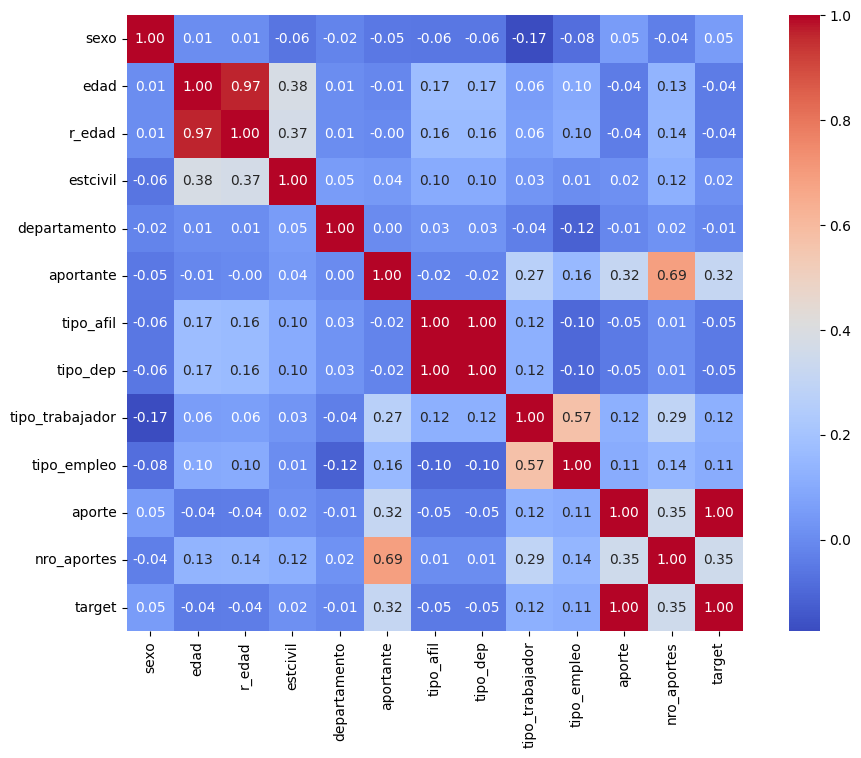

In [14]:
corr = df.corr()
# fix size
plt.figure(figsize=(12, 8))

# plot corr
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
)

In [15]:
df_sample = df.sample(100000)
y = df_sample["target"]
x = df_sample.drop(columns=["target"], axis=1)
del df_sample

In [16]:
# reduce dimensionality (mutual information)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(x, y)

# get columns
cols = selector.get_support(indices=True)
df.iloc[:, cols]

,aportante,tipo_trabajador,tipo_empleo,aporte,nro_aportes
14,0,21.0,0,71.500000,39
22,0,71.0,0,4.030000,129
23,0,20.0,1,144.440000,1
25,0,27.0,1,244.179990,6
29,0,21.0,0,133.250000,153
...,...,...,...,...,...
4660285,1,20.0,0,133.250000,149
4660287,1,21.0,0,198.070010,167
4660288,0,20.0,0,112.190000,116
4660290,0,21.0,0,63.380001,5


In [17]:
new_columns = list(df.iloc[:, cols].columns)
new_columns.append("target")
new_columns

['aportante',
 'tipo_trabajador',
 'tipo_empleo',
 'aporte',
 'nro_aportes',
 'target']

In [18]:
df[new_columns].sample(2_000_000).to_csv("dataset_clean.csv", index=False)